<a href="https://colab.research.google.com/github/OlgaZukova/22.9.1/blob/master/CO2Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Step 2: Enter Data
data = {
    'Car': ['Toyota', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW'],
    'Model': ['Aygo', 'Space Star', 'Citigo', '', 'Cooper', 'Up!'],
    'Volume': [1000, 1200, 1000, 500, 1500, 1000],
    'Weight': [790, 1160, 929, 865, 1140, 929],
    'CO2': [99, 95, 95, 90, 105, 105]
}

df = pd.DataFrame(data)
# Display basic statistics
print(df.describe())

            Volume       Weight         CO2
count     6.000000     6.000000    6.000000
mean   1033.333333   968.833333   98.166667
std     326.598632   149.518449    6.013873
min     500.000000   790.000000   90.000000
25%    1000.000000   881.000000   95.000000
50%    1000.000000   929.000000   97.000000
75%    1150.000000  1087.250000  103.500000
max    1500.000000  1160.000000  105.000000


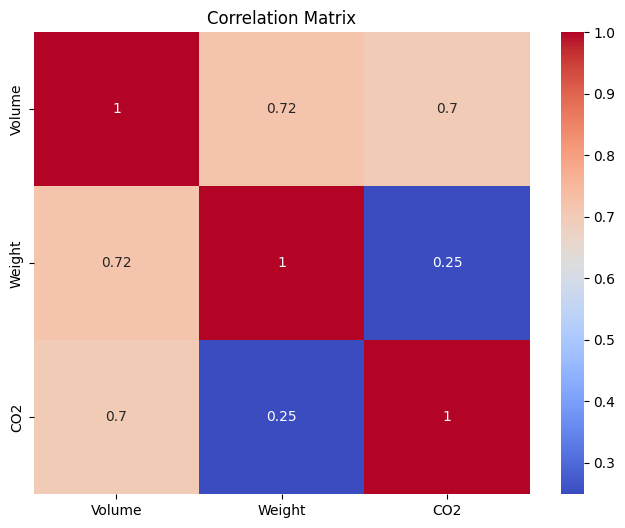

In [ ]:
# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Volume', 'Weight', 'CO2']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Step 3: Data Preparation
#1.Define the target variable (y as Profit) and feature variables (X as R&D Spend, Administration Spend, Marketing Spend).
#2.Split the data into training and testing sets.
X = df[['Volume', 'Weight']]
y = df['CO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
#Step 4: Train the Model
#1.Initialise and fit a Linear Regression model using training data.
#2.Display the model's coefficients and intercept.
# Initialise and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 107.24489795918367
Coefficients: [ 0.02435374 -0.03401361]


In [ ]:
#Step 4: Evaluate the CO2 emission
#1.Predict emission using the testing set.
#2.Calculate RMSE and R² to assess emission.
# Predict on test set
y_pred = model.predict(X_test)
# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 18.431671988523323
R²: -3.607917997130831


In [ ]:
predicted_CO2 = model.predict([[1300, 2300]])
print("Predicted CO2 emission:", predicted_CO2)

Predicted CO2 emission: [60.67346939]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
data = {
    'Car': ['Toyota', 'Mitsubishi', 'Skoda', 'Fiat', 'Mini', 'VW'],
    'Model': ['Aygo', 'Space Star', 'Citigo', '500', 'Cooper', 'Up!'],
    'Volume': [1000, 1200, 1000, 500, 1500, 1000],
    'Weight': [790, 1160, 929, 865, 1140, 929],
    'CO2': [99, 95, 95, 90, 105, 105]
}
df = pd.DataFrame(data)

# Step 3: Train a multiple linear regression model
X = df[['Volume', 'Weight']]
y = df['CO2']
model = LinearRegression()
model.fit(X, y)

# Step 4: Print model details
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 98.22149949326864
Coefficients: [ 0.01988032 -0.02126044]


In [ ]:
custom_input = [[1300, 2300]]
prediction = model.predict(custom_input)
print(f"Predicted CO2 for Volume=1300cm³ and Weight=2300kg: {prediction[0]:.2f} g/km")

Predicted CO2 for Volume=1300cm³ and Weight=2300kg: 75.17 g/km


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


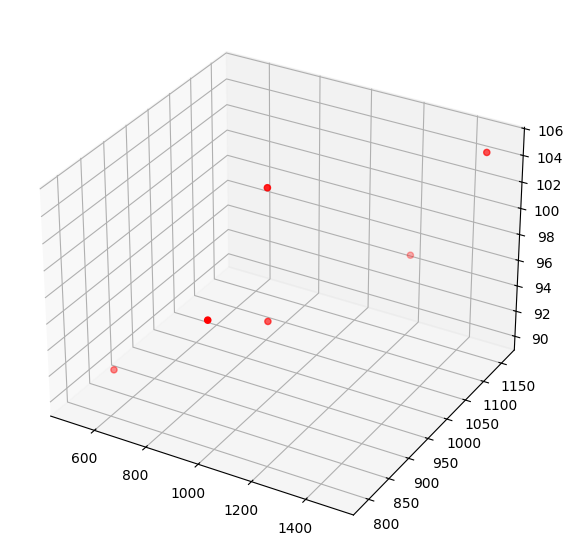

In [ ]:
# Step 6: 3D plot to visualize the regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot actual points
ax.scatter(df['Volume'], df['Weight'], df['CO2'], c='red', label='Actual Data')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


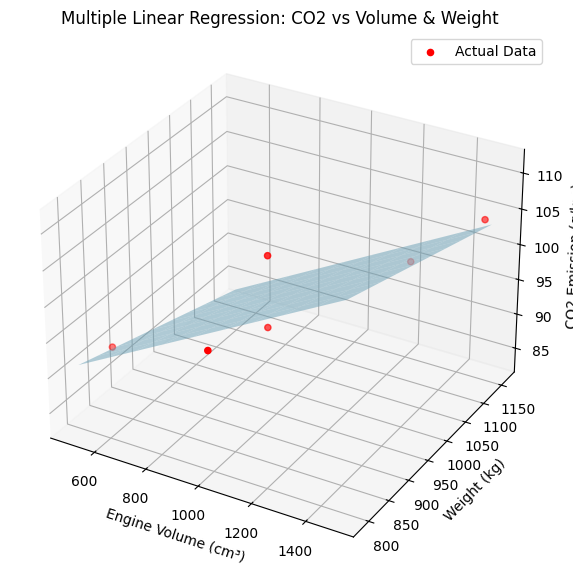

In [ ]:
# Step 7: 3D plot to visualize the regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot actual points
ax.scatter(df['Volume'], df['Weight'], df['CO2'], c='red', label='Actual Data')

# Create meshgrid for Volume and Weight
volume_range = np.linspace(df['Volume'].min(), df['Volume'].max(), 10)
weight_range = np.linspace(df['Weight'].min(), df['Weight'].max(), 10)
Volume_mesh, Weight_mesh = np.meshgrid(volume_range, weight_range)

# Predict CO2 values for the grid
CO2_mesh = model.predict(np.c_[Volume_mesh.ravel(), Weight_mesh.ravel()])
CO2_mesh = CO2_mesh.reshape(Volume_mesh.shape)

# Plot the regression plane
ax.plot_surface(Volume_mesh, Weight_mesh, CO2_mesh, alpha=0.5, color='skyblue')

# Labels
ax.set_xlabel('Engine Volume (cm³)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('CO2 Emission (g/km)')
ax.set_title('Multiple Linear Regression: CO2 vs Volume & Weight')
ax.legend()

plt.show()
